In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt  # creates a basic line plot, and displays it all in one go
import seaborn as sns # powerful visualization library built on top of Matplotlib
import plotly.express as px # high-level interface for creating interactive visualizations with Plotly

from sklearn.preprocessing import LabelEncoder, MinMaxScaler # used for preparing data for machine learning models.
from sklearn.model_selection import train_test_split # This function is essential for splitting a dataset into training and testing sets

from imblearn.over_sampling import SMOTE # effective way to tackle class imbalance in datasets

from sklearn.ensemble import RandomForestClassifier # for random forest 
from sklearn.ensemble import AdaBoostClassifier # for ada boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # used to evaluate the performance of machine learning models.

<a id="2"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>LOADING DATASET</center></h1>

In [2]:
df = pd.read_csv("/kaggle/input/loan-status-prediction-with-added-nans/loan_data_1.csv")

In [3]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,376,LP002953,Male,Yes,3+,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,377,LP002974,Male,Yes,0,Graduate,No,3232.0,NaN,108.0,360.0,1.0,Rural,Y
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,379,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
380,380,LP002990,Female,No,0,NaN,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [6]:
df.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,381.0,190.00,110.13,0.0,95.0,190.0,285.0,380.0
ApplicantIncome,369.0,3563.42,1427.37,150.0,2583.0,3326.0,4226.0,9703.0
CoapplicantIncome,363.0,1267.01,2388.05,0.0,0.0,830.0,2008.0,33837.0
LoanAmount,373.0,104.91,28.48,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.86,68.55,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.84,0.37,0.0,1.0,1.0,1.0,1.0


In [8]:
df.shape

(381, 14)

In [9]:
df.drop(["Unnamed: 0", "Loan_ID"], axis=1, inplace=True)

In [10]:
df["Credit_History"] = df["Credit_History"].apply(lambda x: 1 if x > 0.0 else 0)

<a id="2"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>MISSING VALUE TREATMENT</center></h1>

In [11]:
categoricals_nulls = ["Gender", "Dependents", "Education", "Credit_History", "Self_Employed"]
for i in categoricals_nulls:
    vals = df[i].mode().values[0]
    df[i].fillna(vals, inplace=True)

In [12]:
numericals_nulls = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for i in numericals_nulls:
    vals = df[i].median()
    df[i].fillna(vals, inplace=True)

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1,Urban,Y


In [14]:
categoricals = ["Gender", "Married", "Dependents", "Education", "Self_Employed",
               "Credit_History", "Property_Area", "Loan_Status"]

numericals = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Count of categories

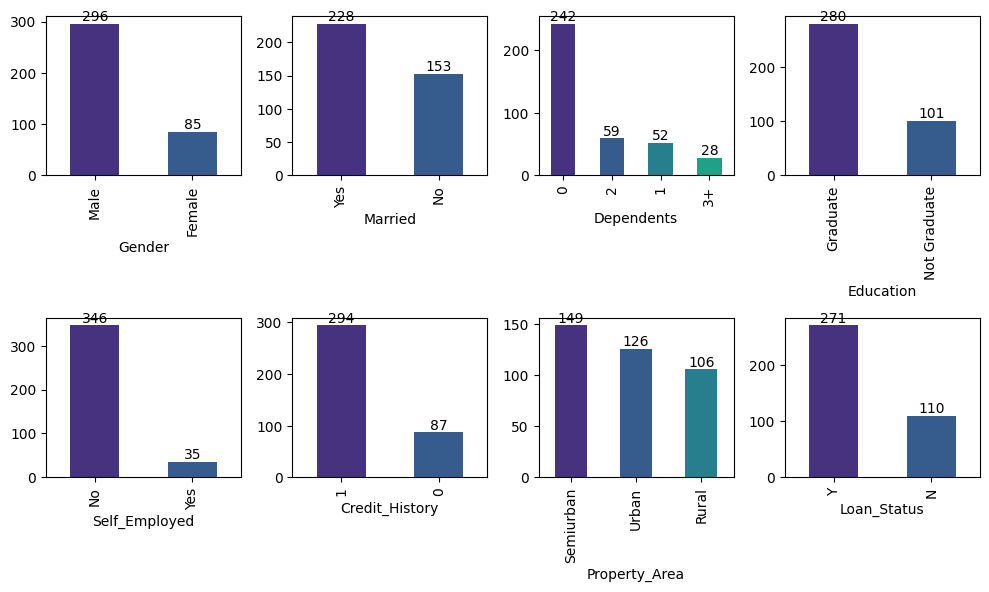

In [15]:
index = 0
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
for i in range(2):
    for j in range(4):
        df[categoricals[index]].value_counts().plot(kind="bar", ax=axes[i][j], color=sns.color_palette("viridis"))
        for container in axes[i][j].containers:
            axes[i][j].bar_label(container)
            
        index += 1
plt.tight_layout()
plt.show()

# Numerical data distribution for each Loan Status

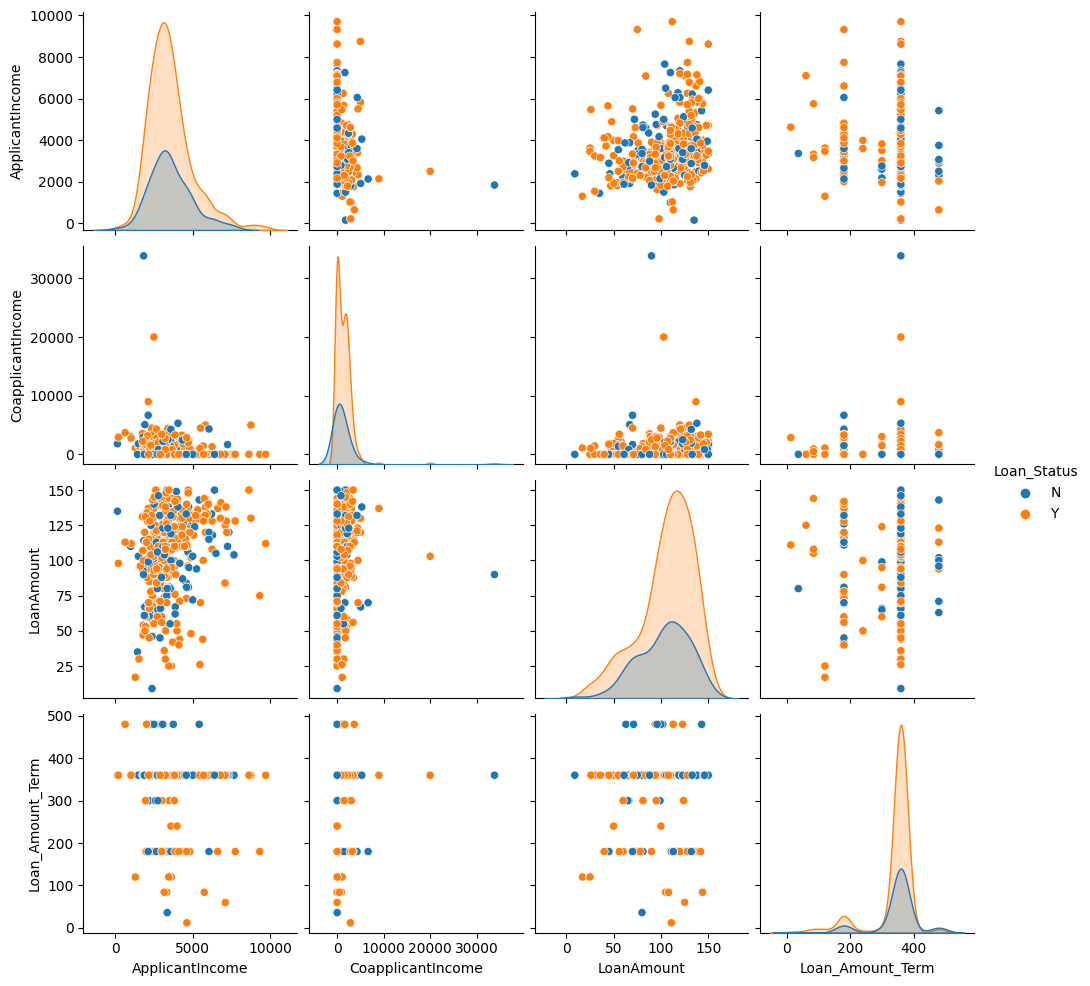

In [17]:
sns.pairplot(df, vars=numericals, hue="Loan_Status")
plt.show()

In [18]:
def plots(df, name, nums, axes):
    group = df.groupby(name)
    mean = group[nums].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes)
    for container in axes.containers:
        axes.bar_label(container, rotation=90, label_type="center")
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Mean values for each category

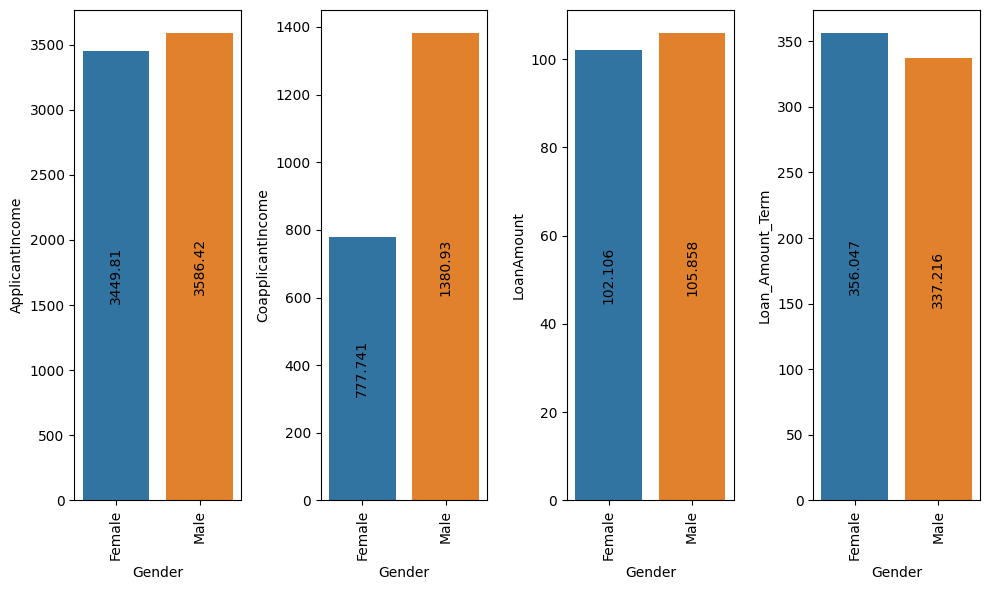

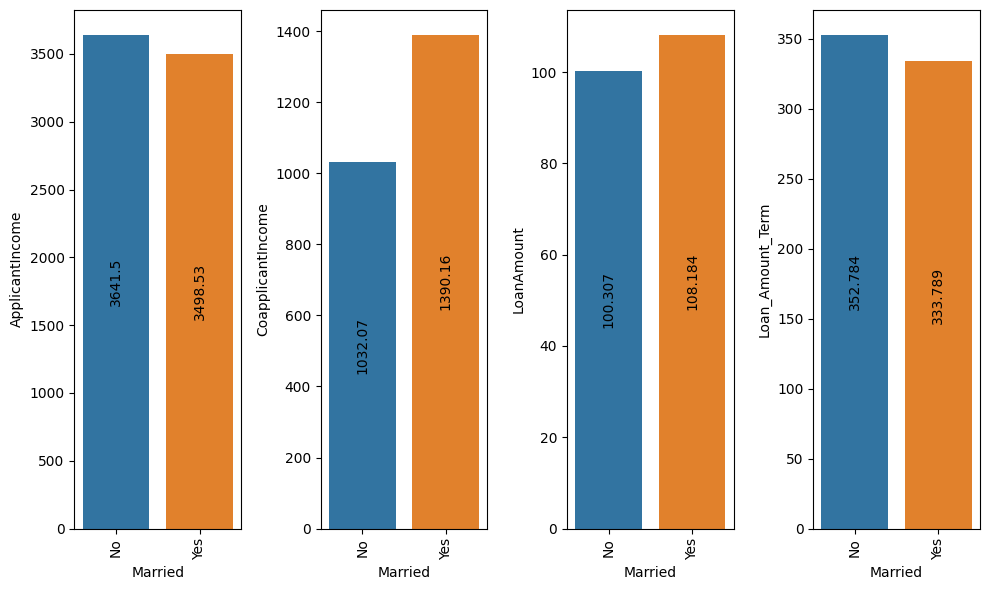

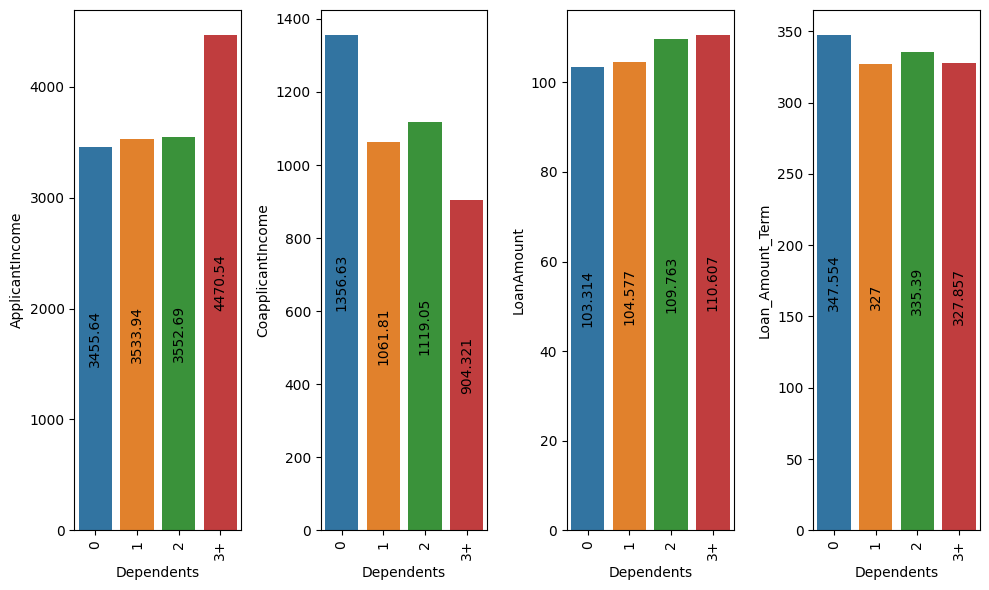

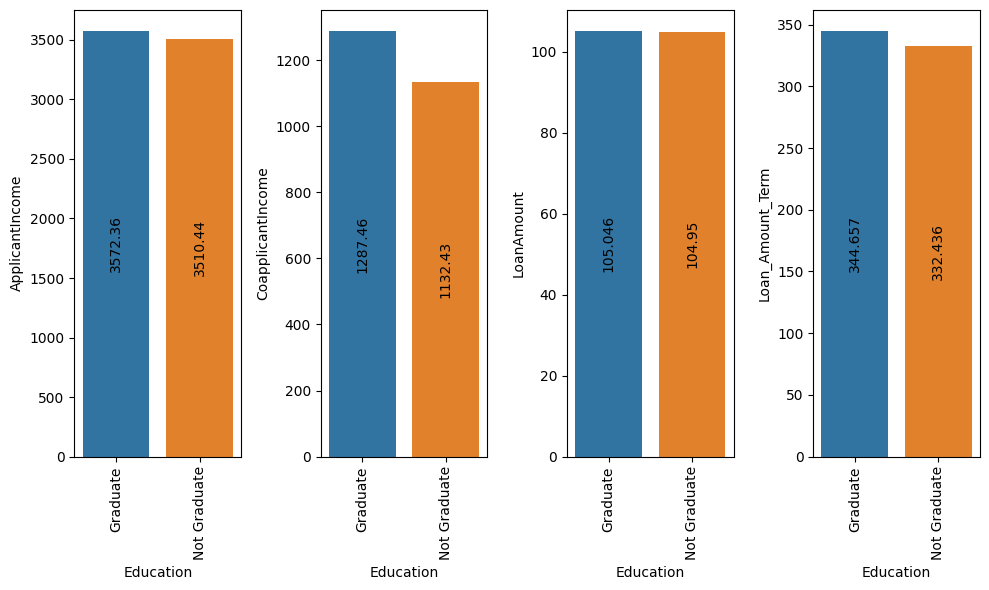

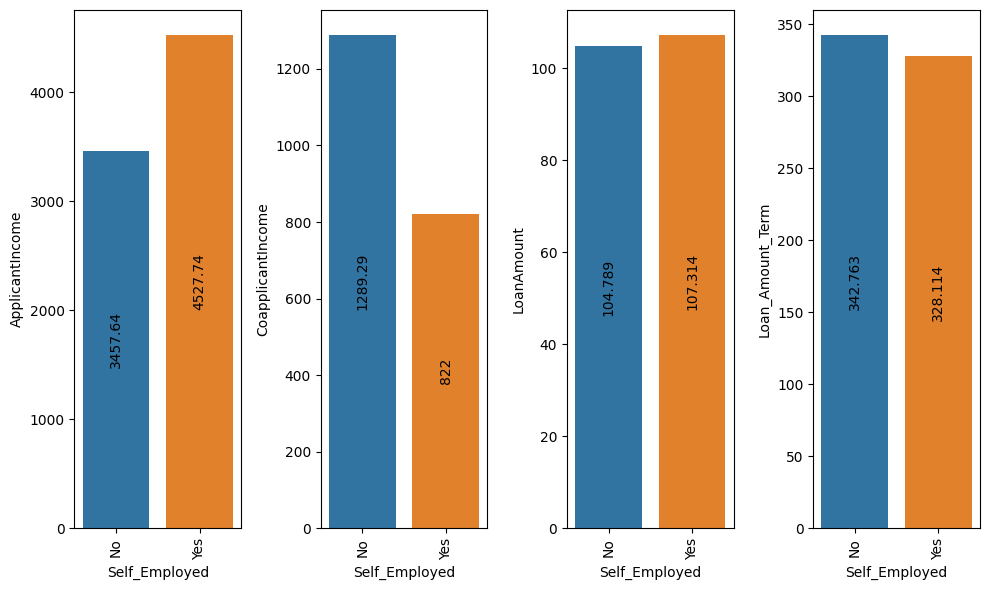

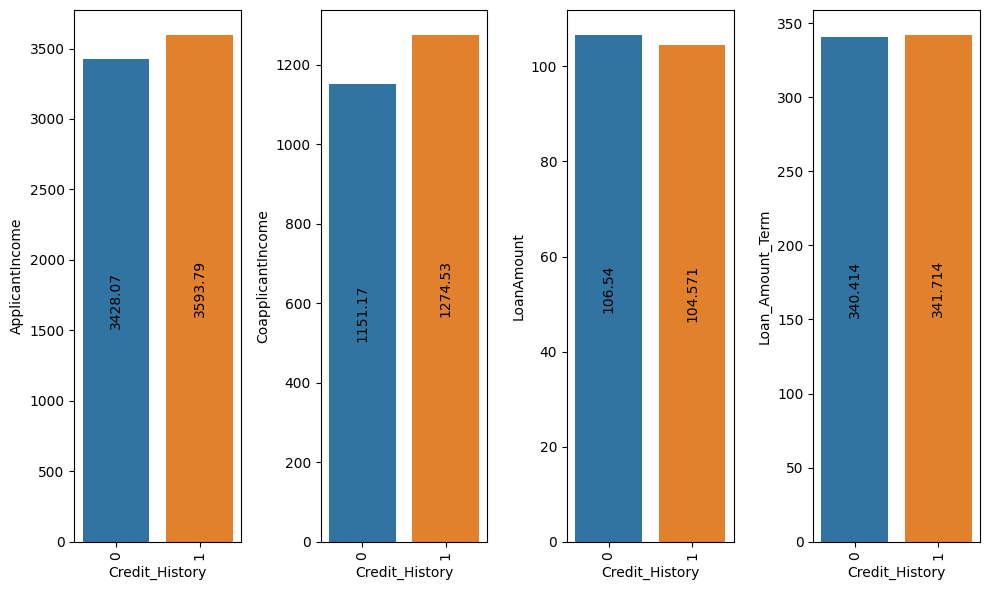

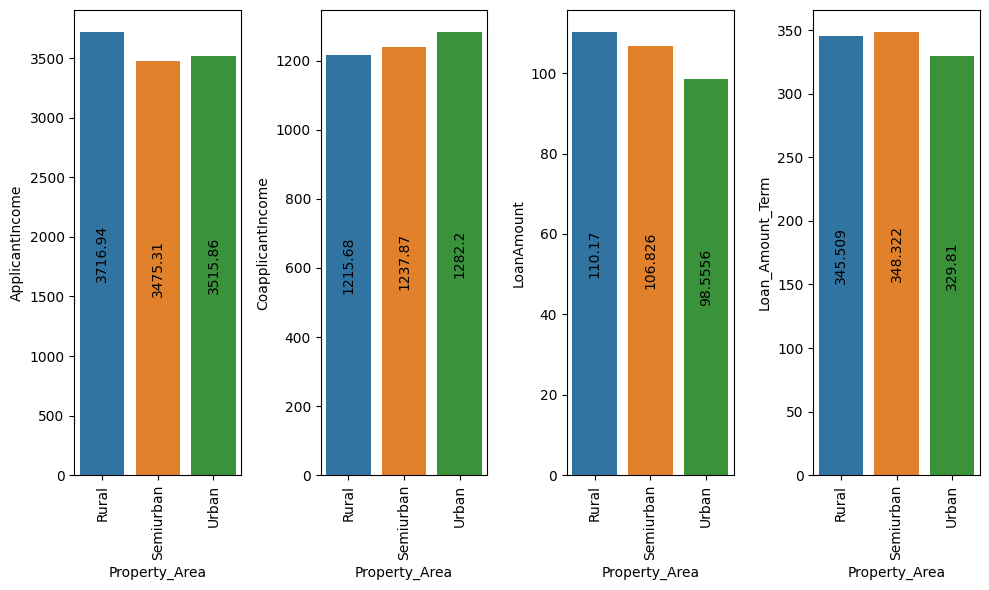

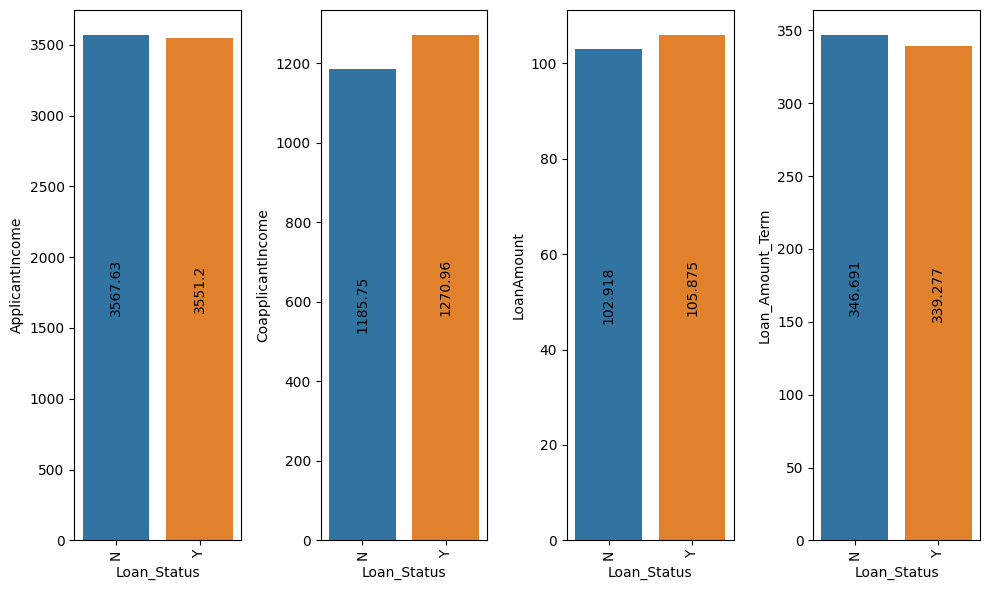

In [19]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 6))
    for k, j in enumerate(numericals):
        plots(df, i, j, axes[k])
    plt.tight_layout()
    plt.show()

# Numerical density for each category, except for loan status which was shown in pairplot

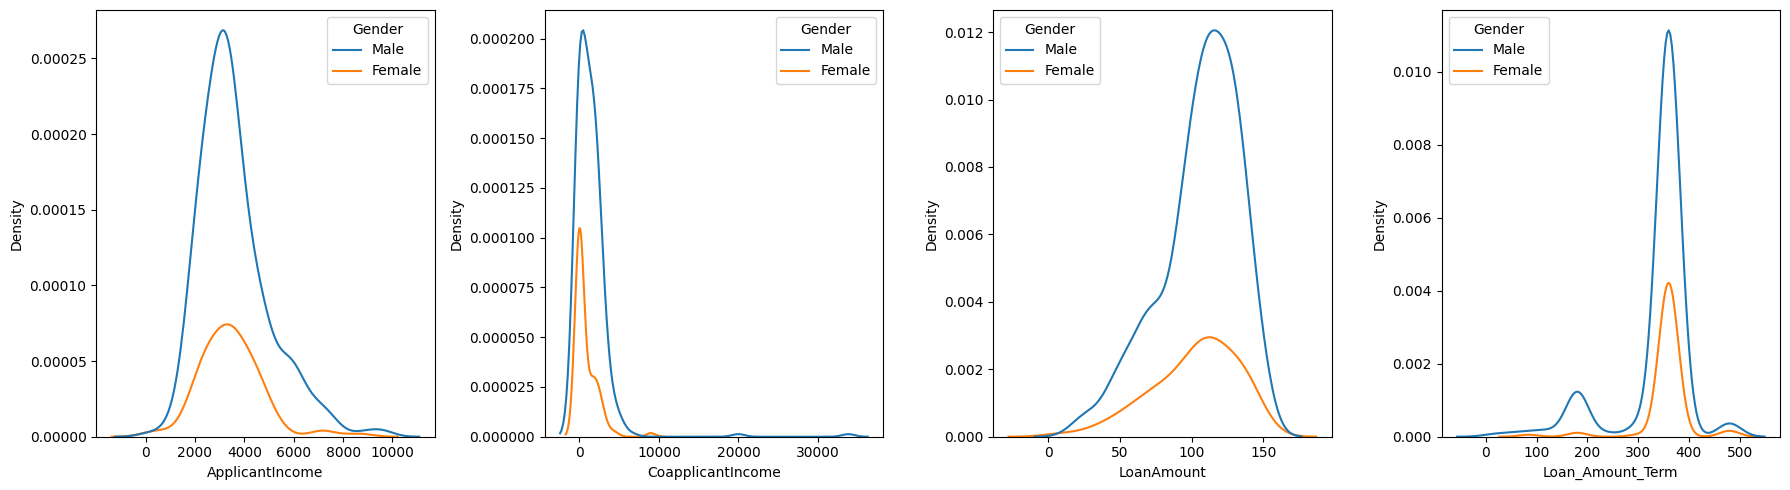

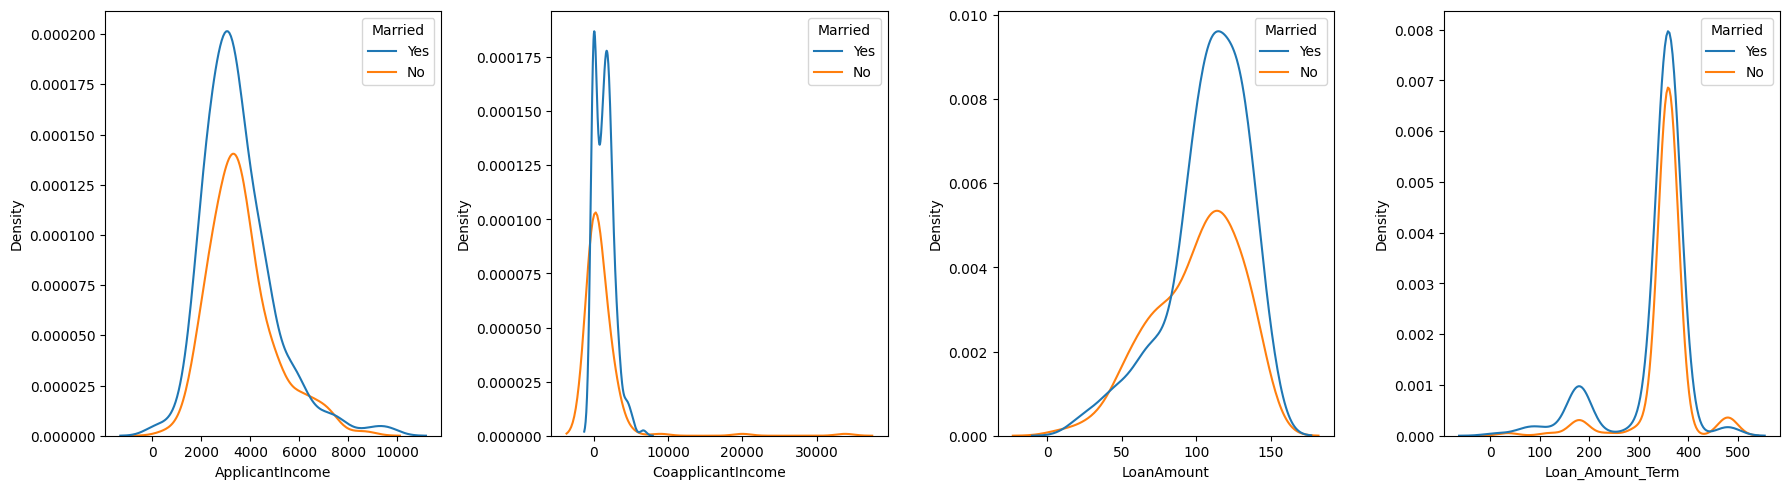

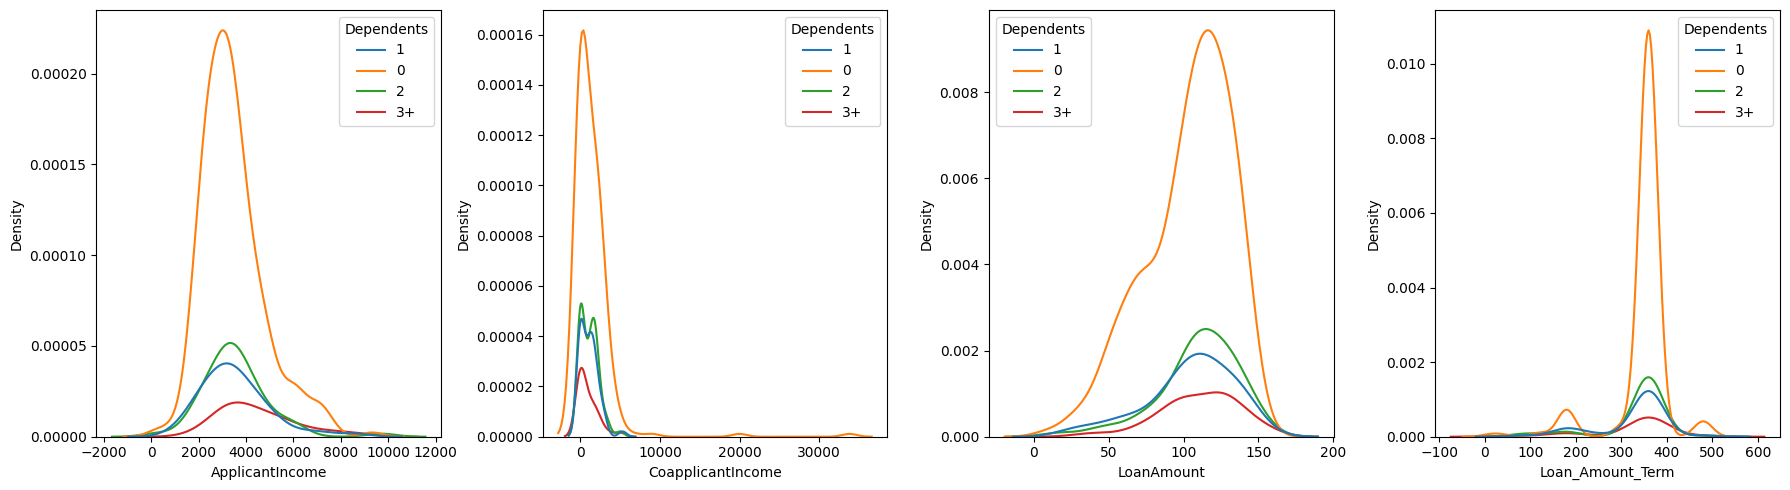

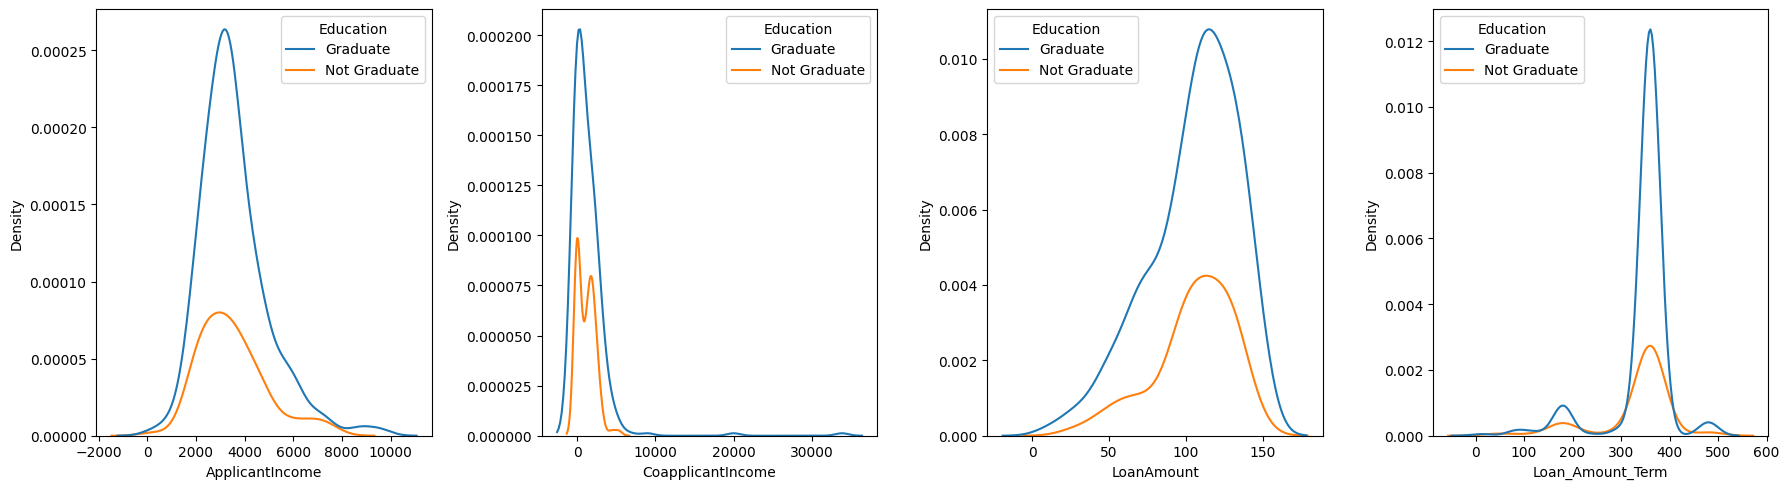

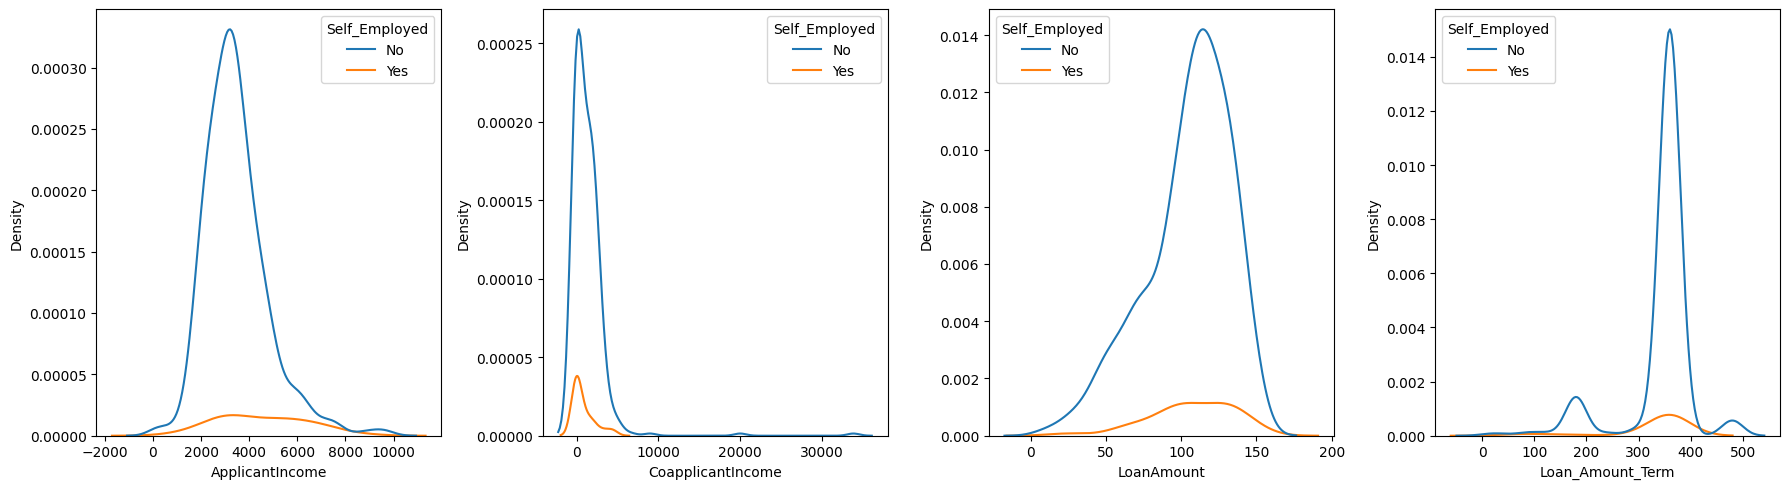

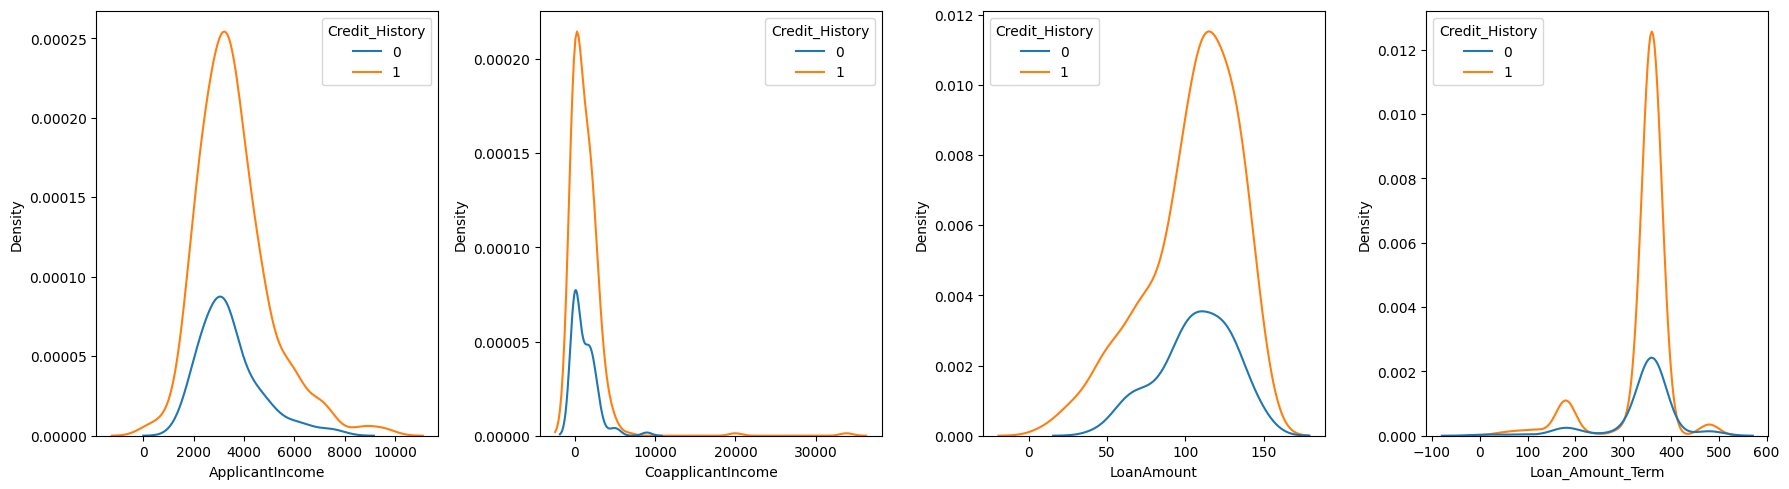

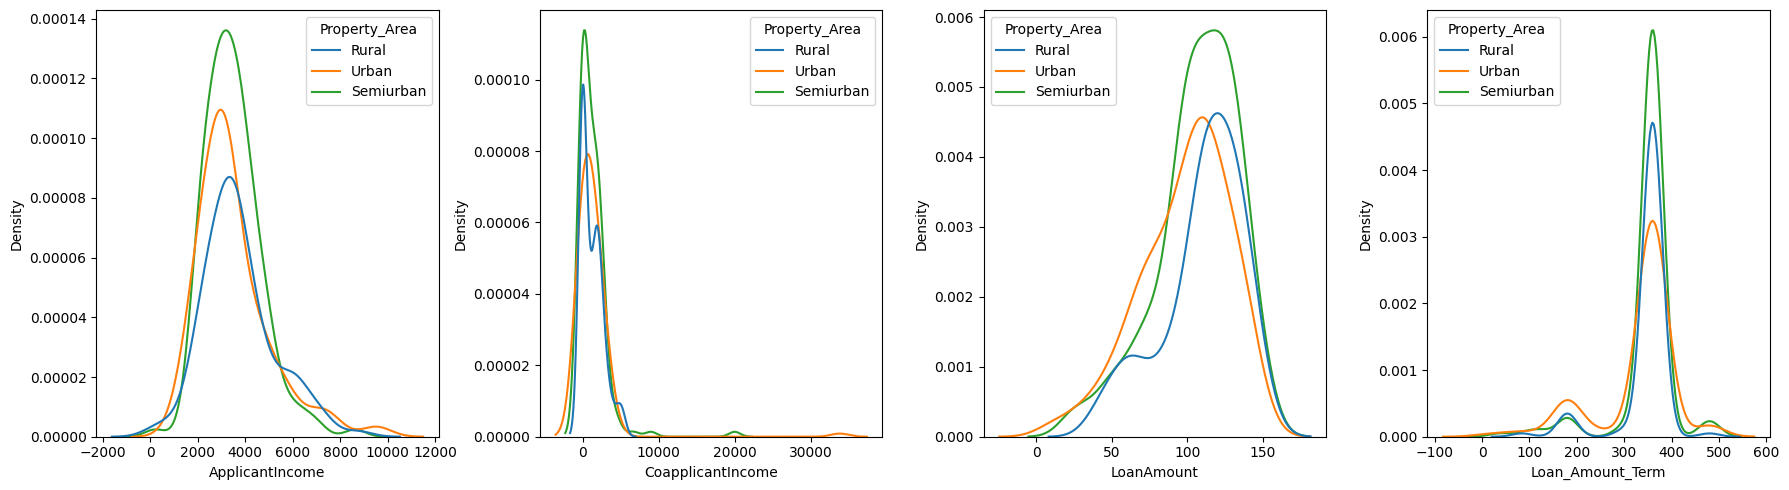

In [20]:
for i in categoricals[:-1]:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))
    for k, j in enumerate(numericals):
        sns.kdeplot(df, x=j, hue=i, ax=axes[k])
    plt.tight_layout()
    plt.show()

OUTLIERS TREATMENT


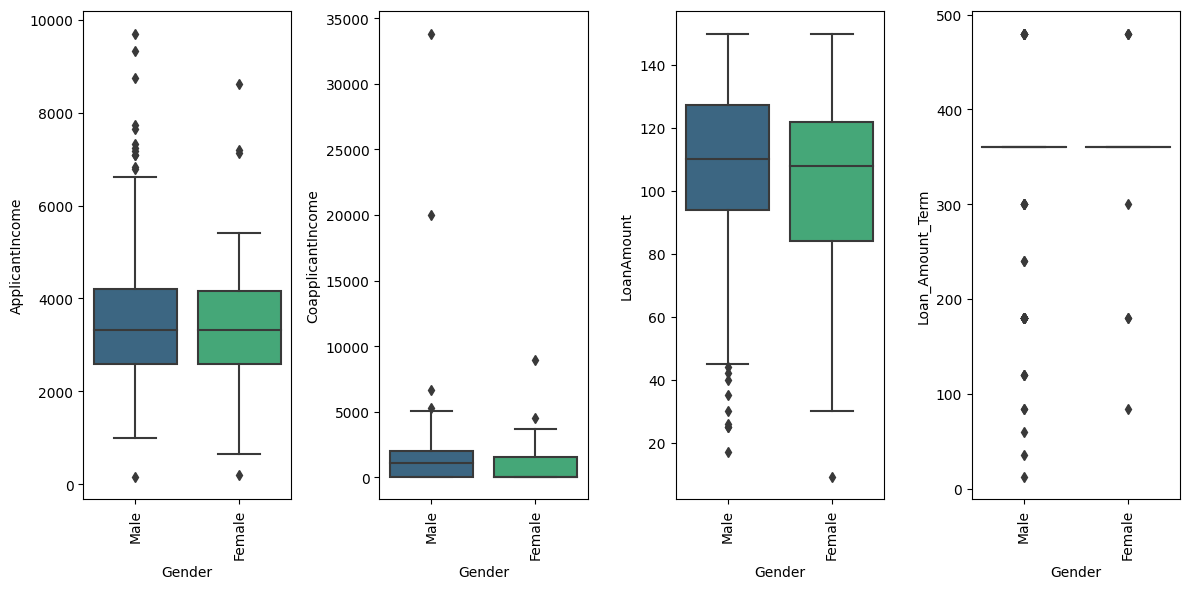

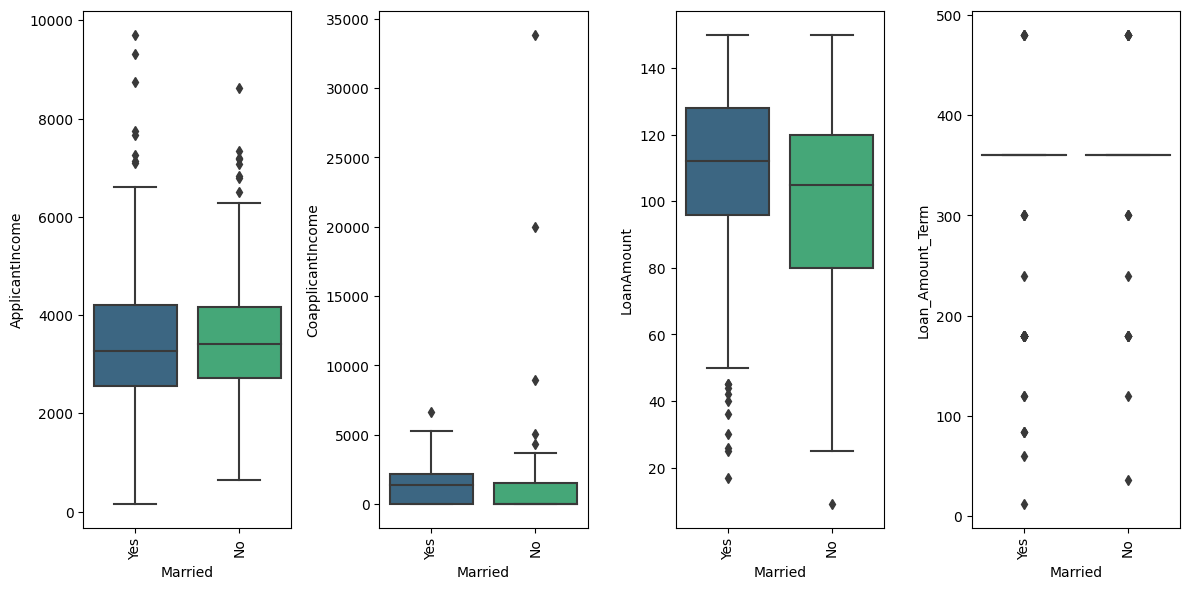

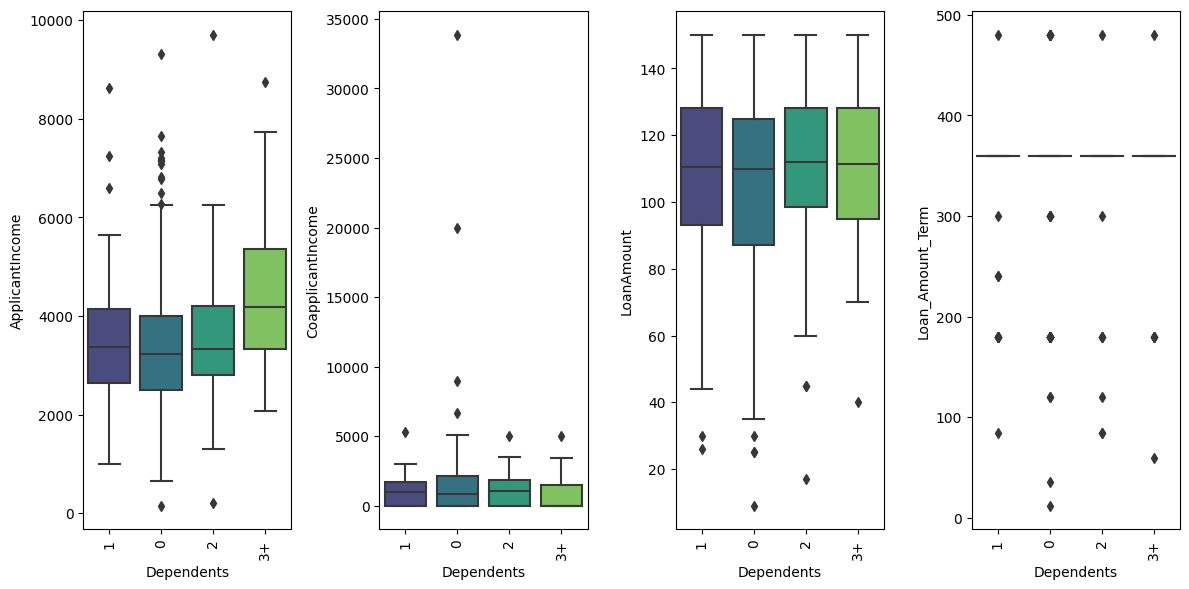

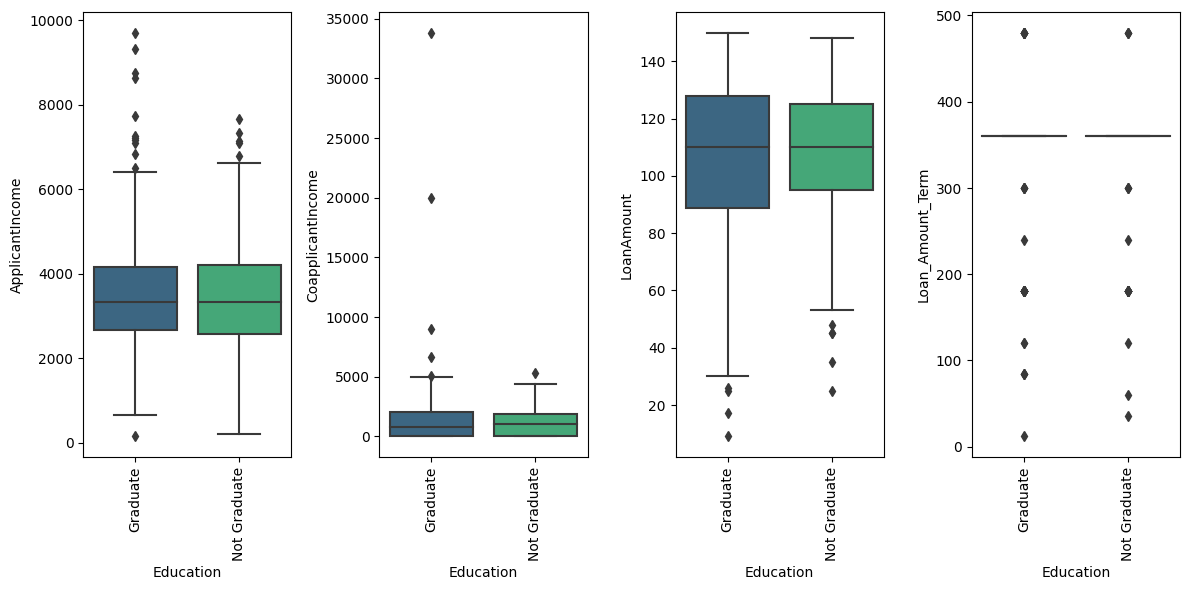

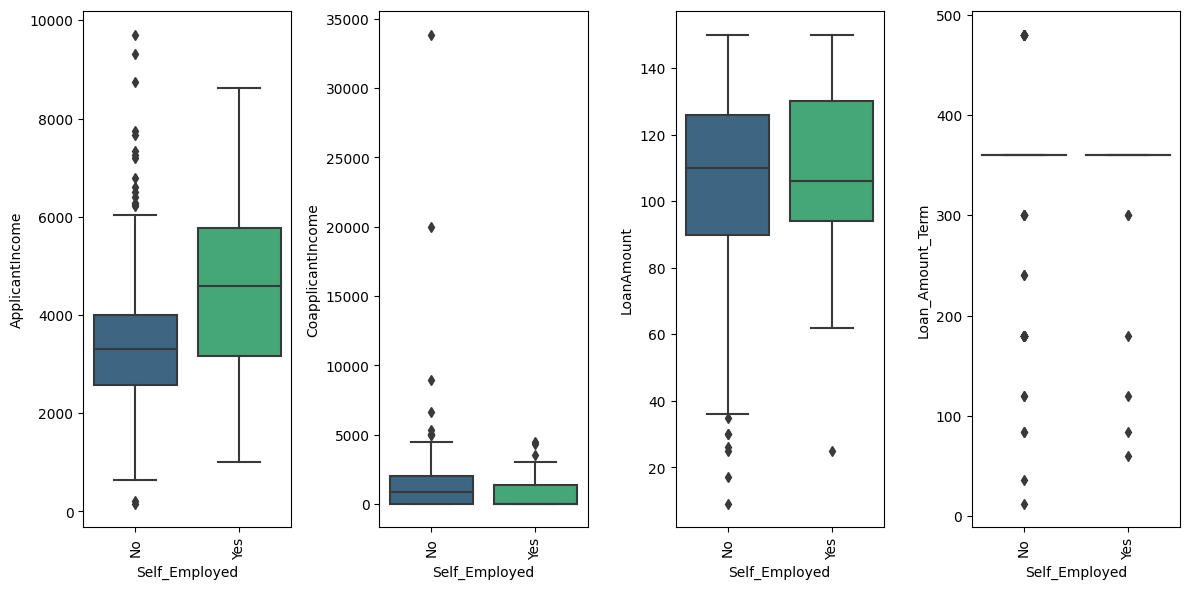

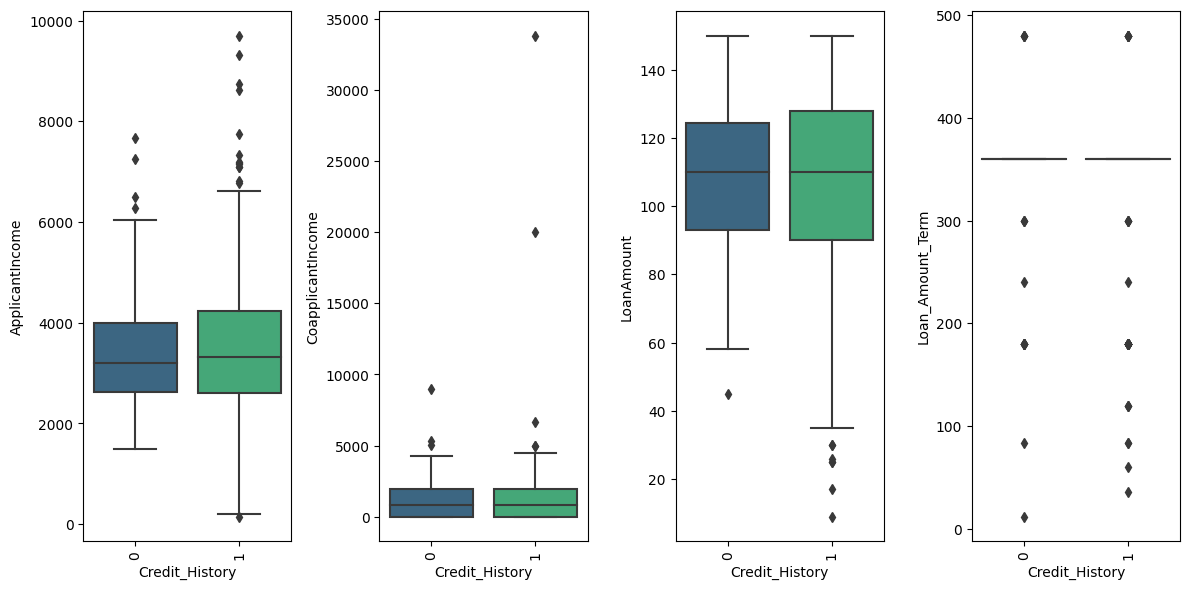

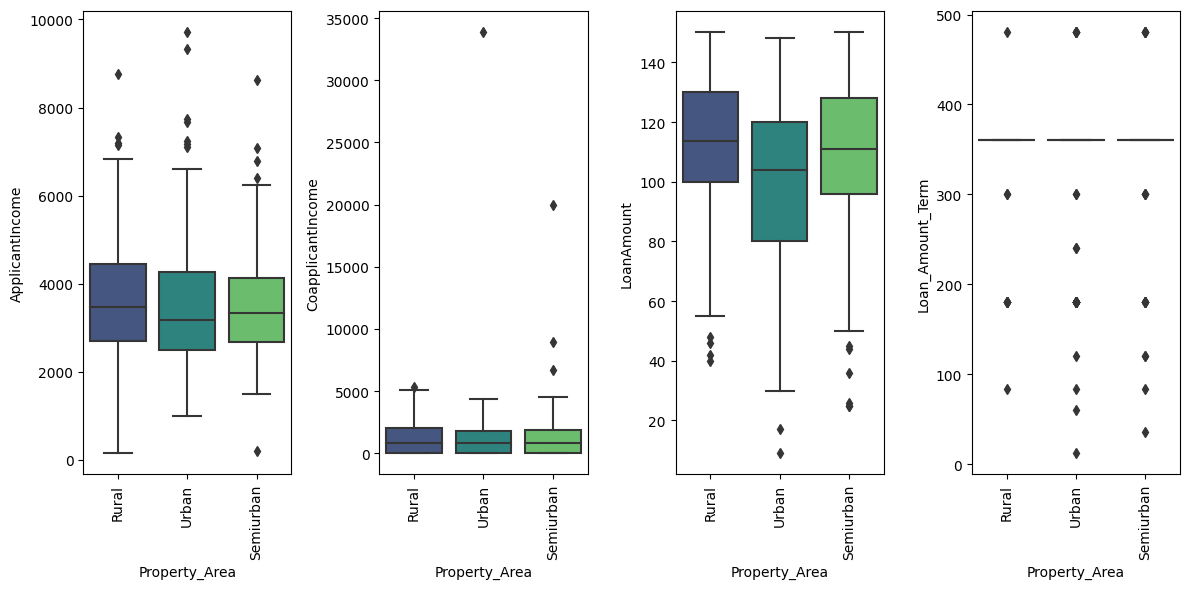

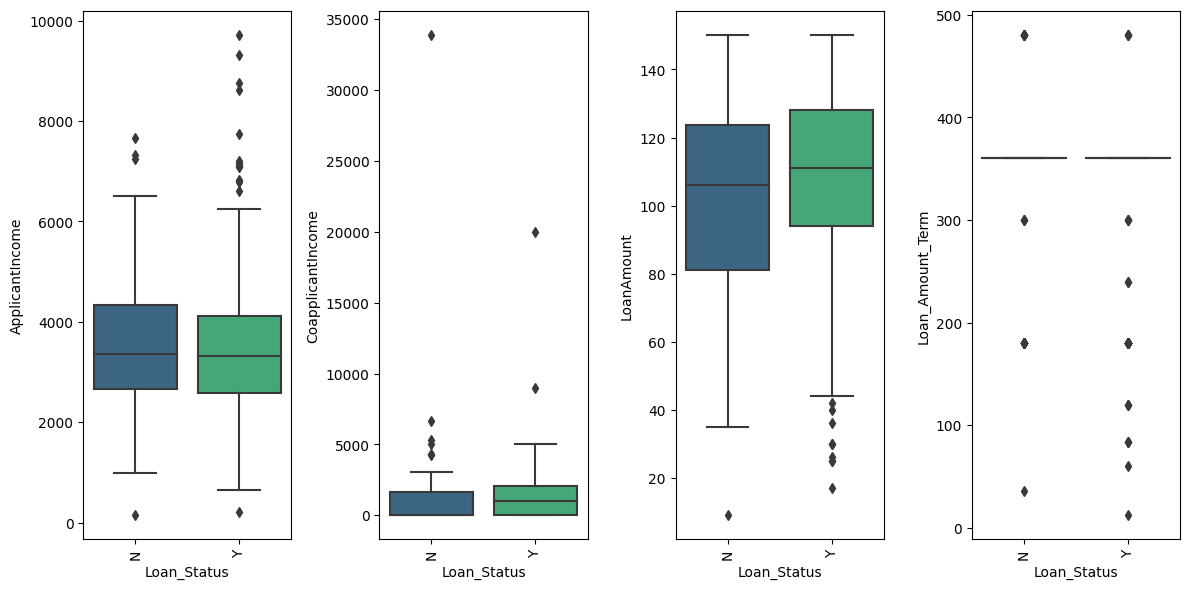

In [21]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))
    for k, j in enumerate(numericals):
        sns.boxplot(df, y=j, x=i, ax=axes[k],palette="viridis")
        axes[k].set_xticklabels(axes[k].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

In [22]:
le = LabelEncoder()
for i in categoricals:
    df[i] = le.fit_transform(df[i])

In [23]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [25]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [26]:
def training(model, name, axes):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, ax=axes)
    axes.set_title("{}: {}%".format(name, round(score*100, 2)))
    return score*100, report

In [27]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
lgr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
xgb = XGBClassifier()

models = [rfc, abc, etc, gbc,
         gnb, lgr, svc, xgb]

names = ["Random Forest", "Ada Boost", "Extra Trees", "Gradient Boosting",
        "Naive Bayes" ,"Logistic Regression", "Support Vectors", "XGBoost"]

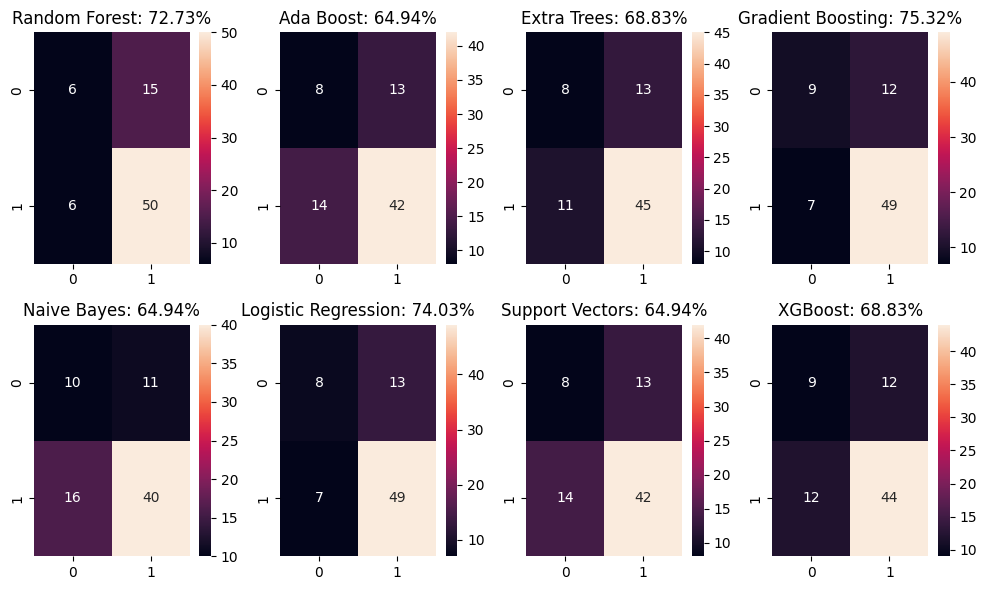

In [28]:
scores = []
reports = []
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
index = 0
for i in range(2):
    for j in range(4):
        score, report = training(models[index], names[index], axes[i][j])
        scores += [score]
        reports += [report]
        index += 1
        
plt.tight_layout()
plt.show()

<a id="2"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>COMPARISON OF MODELS</center></h1>

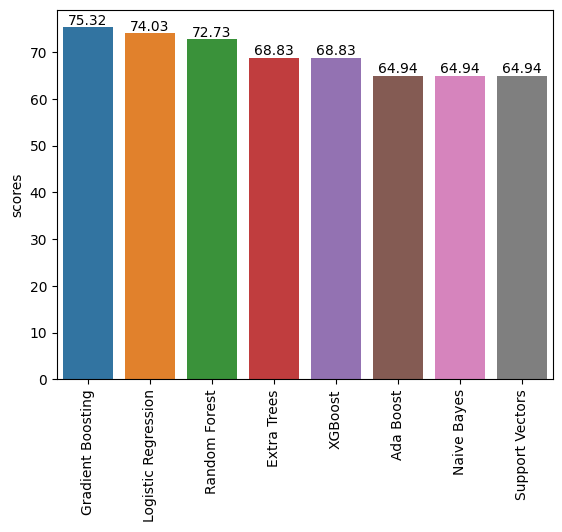

In [29]:
dt = pd.DataFrame({"scores": scores}, index=names)
dt = dt.sort_values("scores", ascending=False)
dt["scores"] = round(dt["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

COMPARISION OF MACHINE LEARNING  MODEL ACCURACY

In [30]:
for i, j in zip(names, reports):
    print("*"*30)
    print(i)
    print(j)
    print("\n\n")

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.50      0.29      0.36        21
           1       0.77      0.89      0.83        56

    accuracy                           0.73        77
   macro avg       0.63      0.59      0.60        77
weighted avg       0.70      0.73      0.70        77




******************************
Ada Boost
              precision    recall  f1-score   support

           0       0.36      0.38      0.37        21
           1       0.76      0.75      0.76        56

    accuracy                           0.65        77
   macro avg       0.56      0.57      0.56        77
weighted avg       0.65      0.65      0.65        77




******************************
Extra Trees
              precision    recall  f1-score   support

           0       0.42      0.38      0.40        21
           1       0.78      0.80      0.79        56

    accuracy                           0.69    

## Summary
Class 1 is better predicted by most models compared to class 0.
Logistic Regression shows the highest accuracy at 74%.
Naive Bayes and SVM also perform well with a balanced precision and recall for both classes.
Gradient Boosting shows the best performance in terms of F1-score for class 0.